In [1]:
# Dominik Csatári | FV1TW4 | 2024.01.09.
# My Kaggle User is: Dominik Csatári | https://www.kaggle.com/dominikcsatri
# For the codes, I've created are highly contributed wiht general documentation code
# from https://scikit-learn.org  as this is where I have learned, how to use, each
# type of estimator, or what hyperparemeters can be tuned, what libraries are recommended to use.

#Set random_seed:
random_seed = 42

In [88]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import csv
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sn


In [79]:
# At this part i read in the files.
X = pd.read_csv('pc_X_train.csv')
Final_X_test = pd.read_csv('pc_X_test.csv')
Y = pd.read_csv('pc_y_train.csv')
X = X.drop(X.columns[0], axis=1)
Final_X_test = Final_X_test.drop(Final_X_test.columns[0], axis=1)

# Split our data for training and testing our model
random_seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y['score'], test_size=0.2, random_state=random_seed)


In [9]:
# This function is for writing out our final predicted y to a file for later upload
def WriteOutput(data,file_path="output.csv"):
    with open(file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        writer.writerow(['id', 'score'])
        
        for idx, score in enumerate(data):
            writer.writerow([idx, score])

In [10]:
# In this process I scaled the dataset 

scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


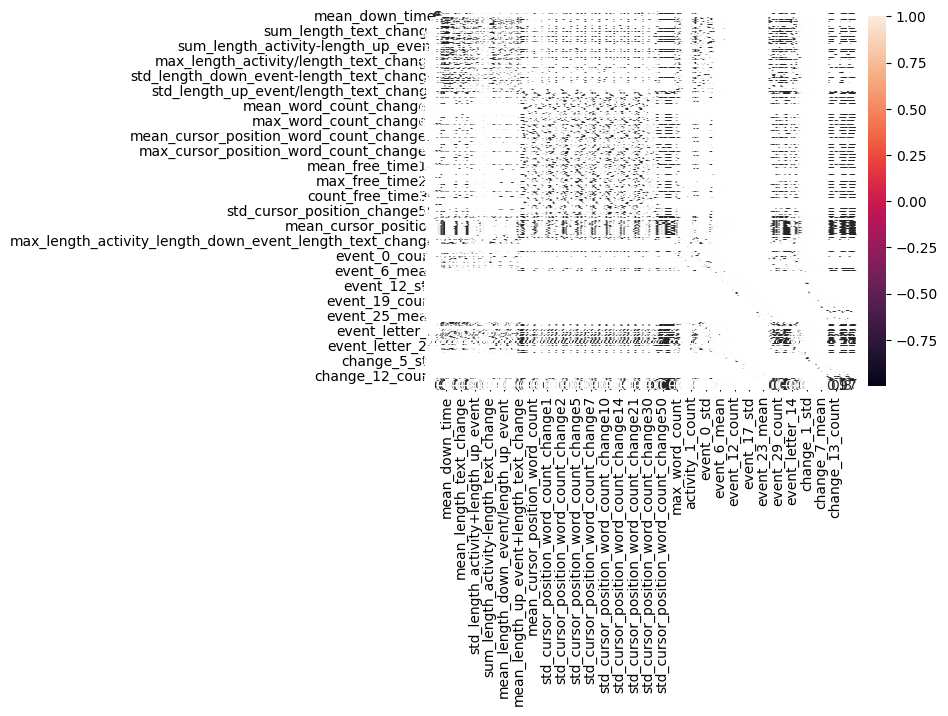

In [11]:
# https://datatofish.com/correlation-matrix-pandas/
corr_matrix = X.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()


In [32]:



ridge_model = Ridge(alpha=0.001)  

ridge_model.fit(X_train, Y_train)

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.45052742838185833
Root Mean Squared Error: 0.6712134000315089


In [49]:
# Simple Grid search for initial alpha value

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

score_lasso=[]
score_ridge= []

alphas = [1,0.5,0.1,0.001]

for a in alphas:
    ridge_model = Ridge(alpha=a)  
    lasso_model = Lasso(alpha=a)

    score_ridge = cross_val_score(ridge_model, X_scaled, Y['score'], cv = 10, scoring = 'r2')
    score_lasso = cross_val_score(lasso_model, X_scaled, Y['score'], cv = 10, scoring = 'r2')
    print("alpha:")
    print(a)
    print("Score ridge:")
    print(np.mean(score_ridge))
    print("Score lasso:")
    print(np.mean(score_lasso))
    print("--------------------")
    

alpha:
1
Score ridge:
0.5361691951902188
Score lasso:
-0.006966241283180597
--------------------
alpha:
0.5
Score ridge:
0.5255129876860926
Score lasso:
0.19979295853834275
--------------------
alpha:
0.1
Score ridge:
0.49335299386577997
Score lasso:
0.5156371603168795
--------------------


C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.772e+01, tolerance: 1.840e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.224e+01, tolerance: 1.861e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

alpha:
0.001
Score ridge:
0.3624922161107894
Score lasso:
0.5735078627292729
--------------------


C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.530e+01, tolerance: 1.808e-01
  model = cd_fast.enet_coordinate_descent(


In [81]:
# Up on the previous estimation we would get the best result with lasso alpha=1.
# This basically means feature selection, as regularizer dominates.

In [67]:

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


lasso_model = Lasso(alpha=0.001).fit(X_train_scaled,Y_train)
pred = lasso_model.predict(X_test_scaled)
mean_squared_error(pred, Y_test)

C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.672e+00, tolerance: 1.684e-01
  model = cd_fast.enet_coordinate_descent(


0.42070347681730363

In [86]:
lasso_model = Lasso(alpha=1).fit(X,Y['score'])
Final_pred = lasso_model.predict(Final_X_test)
WriteOutput(Final_pred,"lastLasso.csv")


C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.682e+02, tolerance: 2.068e-01
  model = cd_fast.enet_coordinate_descent(
